In [1]:
library(dplyr)

get_scouting_data <- function(input_filename) {
    data <- read.csv(input_filename)

    # Set empty cells to 0
    data[is.na(data)] <- 0

    # Convert Climbing column to a numeric value.
    NumericClimb <- list('Level 3' = 12, 'Level 2' = 6, 'Level 1' = 3, 'Not on HAB' = 0)
    data[,'Climbing'] <- mapply(function(x) NumericClimb[[x]], as.vector(data[,'Climbing']))

    data <- rename(data,
        ScoutName = Your.name..FirstName.LastName.,
        Match = Match..,
        Team = Team..,
        StartPosition = Starting.Position,
        StartLevel2 = Starts.on.Level.2.,
        MovedSandstorm = Moved.during.sandstorm.,
        HabLine = Crossed.HAB.line.,
        StartHatch = Starts.with,
        HatchSandstorm = X..of.hatch.panels.placed.during.sandstorm,
        HatchSandstorm = X..of.cargo.placed.during.sandstorm,
        CargoSandstorm = X..of.cargo.placed.during.sandstorm,
        HatchPanels = Hatch.Panels,
        HatchCargoBay = X..of.hatch.panels.on.the.cargo.bay,
        HatchBottomRocket = X..of.hatch.panels.on.the.bottom.of.the.rocket,
        HatchMidRocket = X..of.hatch.panels.on.the.middle.of.the.rocket,
        HatchTopRocket = X..of.hatch.panels.on.the.top.of.the.rocket,
        HatchMissed = X..of.hatch.panels.missed,
        CargoCargoBay = X..of.cargo.in.the.cargo.bay,
        CargoBottomRocket = X..of.cargo.in.the.bottom.of.the.rocket,
        CargoMidRocket = X..of.cargo.in.the.middle.of.the.rocket,
        CargoTopRocket = X..of.cargo.in.the.top.of.the.rocket,
        CargoMissed = X..of.cargo.missed,
        DefenseSuccess = Played.defense.successfully,
        WeakDefense = Weak.to.defense..tippy..easily.pushed..etc.,
        BadStuff = Bad.stuff,
        Fouls = X..of.fouls,
        TechFouls = X..of.tech.fouls,
        RobotDisabled = Robot.disabled,
        RobotFail = Robot.failure,
        TippedOver = Tipped.over,
        Reckless = Reckless.driving,
        YellowCard = Yellow.card,
        RedCard = Red.card
    )

    return(data)
}

get_summary_data <- function(input_filename) {
    scouting_data <- get_scouting_data(input_filename)

    summary_data <- summarise(group_by(scouting_data, Team),
        StartScore = mean(0.5 * StartLevel2 + 0.5 * MovedSandstorm + 0.25 * HabLine + 1.3 * HatchSandstorm + 1.3 * CargoSandstorm),
        HatchScore = mean(HatchCargoBay + HatchBottomRocket + 1.1 * HatchMidRocket + 1.2 * HatchTopRocket - HatchMissed),
        CargoScore = mean(CargoCargoBay + CargoBottomRocket + 1.1 * CargoMidRocket + 1.2 * CargoTopRocket),
        ClimbScore = mean(Climbing),
        DefenseScore = mean(2.5 * DefenseSuccess),
        FoulScore = mean(Fouls + 2 * TechFouls + 2 * YellowCard + 4 * RedCard),
        FailScore = mean(5 * RobotDisabled + 3 * RobotFail + 3 * TippedOver + Reckless),
        Score = StartScore + HatchScore + CargoScore + ClimbScore + DefenseScore
    )

    sorted_data <- arrange(summary_data, desc(Score))

    return(sorted_data)
}

plot_scores <- function(match_data, output_filename='') {
    if (output_filename != '') {
        png(output_filename, width=640, height=500)
    }

    plot_data <- t(cbind(match_data[,'StartScore'], match_data[,'HatchScore'], match_data[,'CargoScore'], match_data[,'ClimbScore'], match_data[,'DefenseScore']))

    barplot(plot_data, names = match_data$Team,
        xlab = 'Team', ylab='Score', main='Team Scores',
        legend = c('Sandstorm Score', 'Hatch Score', 'Cargo Score', 'Climb Score', 'Defense Score'),
        col = c('blue', 'red', 'yellow', 'magenta', 'green'), las=2)

    if (output_filename != '') {
        dev.off()
    }
}

plot_fail_foul <- function(match_data, output_filename='') {
    if (output_filename != '') {
        png(output_filename, width=640, height=500)
    }

    plot_data <- t(cbind(match_data[,'FoulScore'], match_data[,'FailScore']))

    barplot(plot_data, names = match_data$Team,
        xlab = 'Team', ylab='Fail/Foul Score', main='Team Fail/Foul Scores',
        legend = c('Foul Score', 'Fail Score'),
        col = c('darkgreen', 'darkred'), las=2)

    if (output_filename != '') {
        dev.off()
    }
}

plot_total_score <- function(match_data, output_filename='') {
    if (output_filename != '') {
        png(output_filename, width=640, height=500)
    }

    barplot(t(match_data[,'Score']), names = match_data$Team,
        xlab = 'Team', ylab='Score', main='Team Score',
        legend = 'Score',
        col = 'cyan', las=2)

    if (output_filename != '') {
        dev.off()
    }
}



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
auburn_data <- get_summary_data('../Data/Scouting_2019/Auburn_MtView_Saturday.csv')

In [4]:
auburn_data

Team,StartScore,HatchScore,CargoScore,ClimbScore,DefenseScore,FoulScore,FailScore,Score
2046,2.6800000,3.4200000,4.0500000,9.6000000,0.5000000,0.0000000,0.3000000,20.250000
1983,2.4750000,1.5300000,3.7300000,10.8000000,0.7500000,0.0000000,0.0000000,19.285000
5827,1.3277778,0.8888889,0.0000000,9.0000000,0.0000000,0.0000000,0.0000000,11.216667
3588,2.4777778,1.3111111,1.2333333,4.0000000,1.1111111,0.1111111,0.1111111,10.133333
4915,0.7250000,0.0000000,0.3000000,7.5000000,0.5000000,0.2000000,1.4000000,9.025000
1903,1.0000000,0.0000000,5.0000000,3.0000000,0.0000000,0.0000000,0.0000000,9.000000
948,1.0555556,0.7777778,3.4444444,3.0000000,0.5555556,0.0000000,0.1111111,8.833333
5937,1.1562500,0.5000000,1.2500000,5.2500000,0.3125000,0.1250000,1.0000000,8.468750
3574,1.4428571,1.1428571,0.0000000,5.1428571,0.3571429,0.7142857,1.2857143,8.085714
2976,1.3833333,1.9555556,2.4666667,2.0000000,0.2777778,0.0000000,0.1111111,8.083333


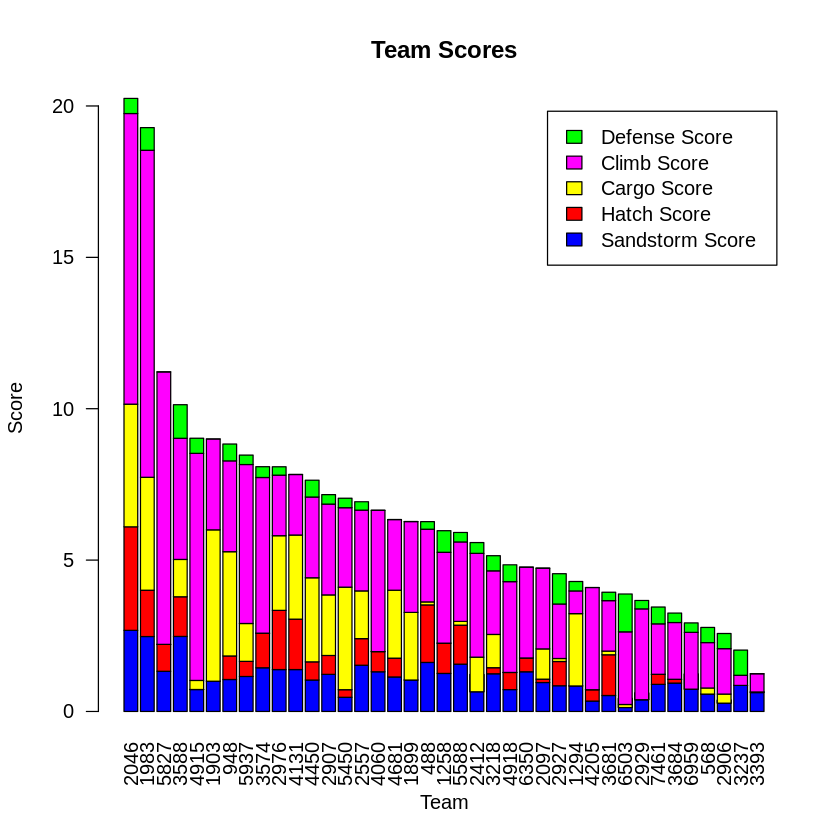

In [5]:
plot_scores(auburn_data)

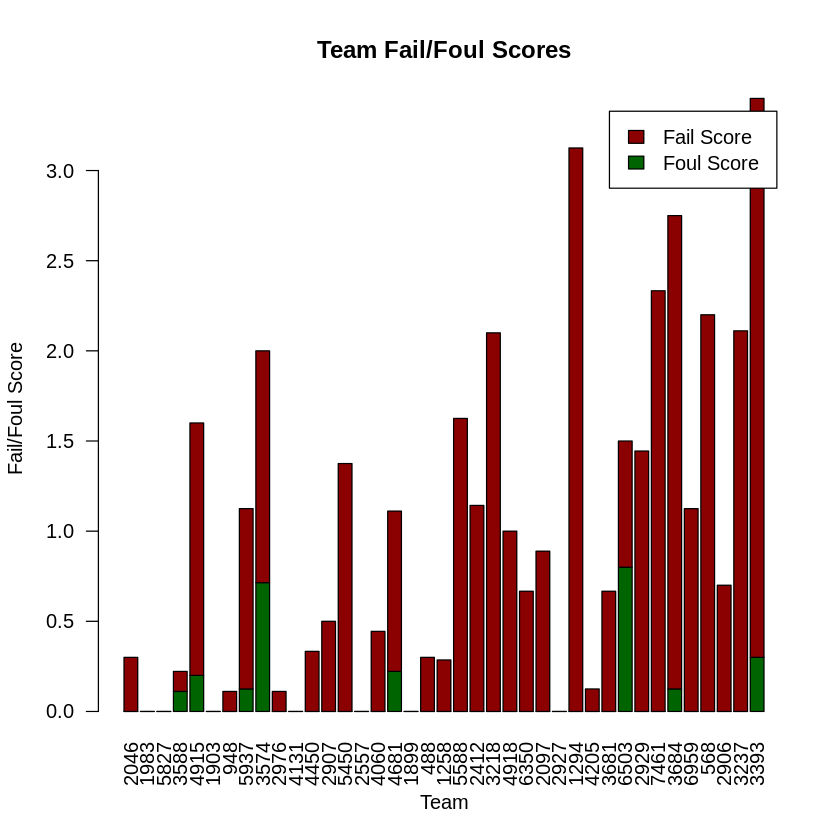

In [6]:
plot_fail_foul(auburn_data)

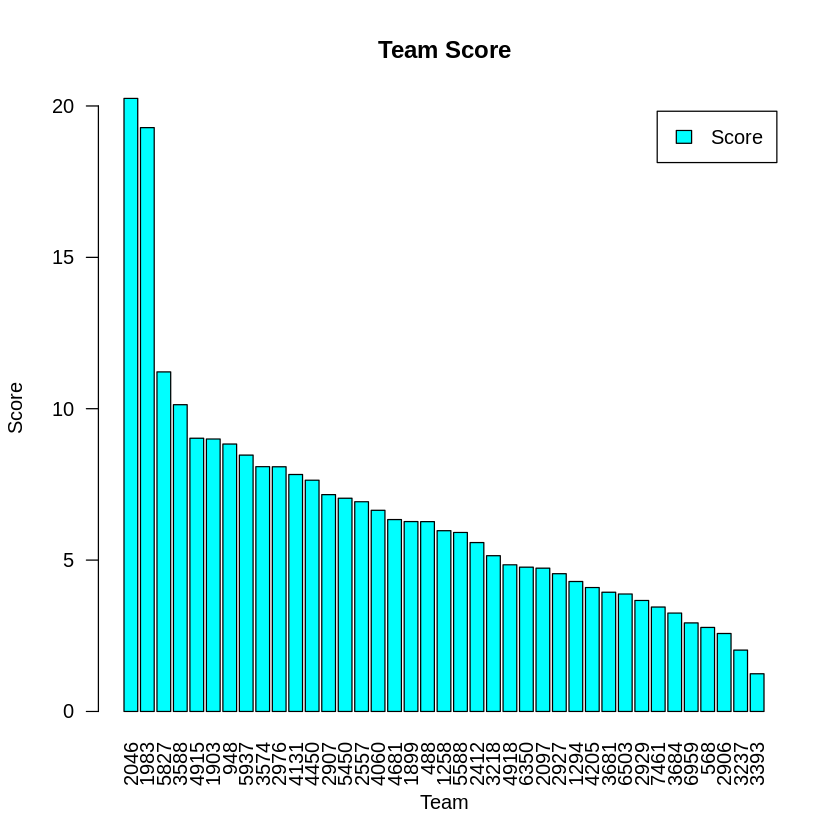

In [7]:
plot_total_score(auburn_data)